# Multi Armed Bandit Problem Using UCB Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import random; random.seed(90)

In [2]:
plt.style.use('ggplot')

## Import Datasets

In [3]:
datasets = pd.read_csv('./data/ads_clicks.csv')
datasets.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
ad1_rates = datasets['Ad 1'].sum() / len(datasets['Ad 1']); print(f'Click rates of Ad 1: {ad1_rates:.4f}')
ad2_rates = datasets['Ad 2'].sum() / len(datasets['Ad 2']); print(f'Click rates of Ad 2: {ad2_rates:.4f}')
ad3_rates = datasets['Ad 3'].sum() / len(datasets['Ad 3']); print(f'Click rates of Ad 3: {ad3_rates:.4f}')
ad4_rates = datasets['Ad 4'].sum() / len(datasets['Ad 4']); print(f'Click rates of Ad 4: {ad4_rates:.4f}')
ad5_rates = datasets['Ad 5'].sum() / len(datasets['Ad 5']); print(f'Click rates of Ad 5: {ad5_rates:.4f} (The Most Frequently Clicked One!)')
ad6_rates = datasets['Ad 6'].sum() / len(datasets['Ad 6']); print(f'Click rates of Ad 6: {ad6_rates:.4f}')
ad7_rates = datasets['Ad 7'].sum() / len(datasets['Ad 7']); print(f'Click rates of Ad 7: {ad7_rates:.4f}')
ad8_rates = datasets['Ad 8'].sum() / len(datasets['Ad 8']); print(f'Click rates of Ad 8: {ad8_rates:.4f}')
ad9_rates = datasets['Ad 9'].sum() / len(datasets['Ad 9']); print(f'Click rates of Ad 9: {ad9_rates:.4f}')
ad10_rates = datasets['Ad 10'].sum() / len(datasets['Ad 10']); print(f'Click rates of Ad 10: {ad10_rates:.4f}')

Click rates of Ad 1: 0.1703
Click rates of Ad 2: 0.1295
Click rates of Ad 3: 0.0728
Click rates of Ad 4: 0.1196
Click rates of Ad 5: 0.2695 (The Most Frequently Clicked One!)
Click rates of Ad 6: 0.0126
Click rates of Ad 7: 0.1112
Click rates of Ad 8: 0.2091
Click rates of Ad 9: 0.0952
Click rates of Ad 10: 0.0489


## Random Selection Method

In [5]:
N = len(datasets) # 10000
number_of_ads = len(datasets.columns) # 10
ads_selected = []
total_rewards = 0

In [6]:
random_rewards_history = []

for n in range(0, N):
    ad = random.randrange(number_of_ads)
    ads_selected.append(ad)
    reward = datasets.values[n, ad]
    total_rewards = total_rewards + reward
    random_rewards_history.append(total_rewards)

In [7]:
print(f'Total rewards achieved by {N} random selections: {total_rewards}')

Total rewards achieved by 10000 random selections: 1268


In [8]:
optimal_policy = pd.Series(ads_selected).value_counts(normalize=True).sort_values(ascending=False)
optimal_policy.index += 1 

print(f'The policy of the most displayed ad is: {optimal_policy.index[0], optimal_policy.index[1], optimal_policy.index[2]} (Wrong!)')

The policy of the most displayed ad is: (2, 6, 1) (Wrong!)


## Upper Confidence Bound Method

In [9]:
N = len(datasets) # 10000
number_of_ads = len(datasets.columns) # 10
ads_selected = []
numbers_of_selections = [0] * number_of_ads
sums_of_reward = [0] * number_of_ads
total_rewards = 0

In [10]:
ucb_rewards_history = []

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, number_of_ads):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            # apply UCB equation for calculating upper bound by action-value and confidence term
            # this will ultimately lead to the optimal action being selected repeatedly in the end
            confidence_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + confidence_i
        else:
            # uncertainty threshold
            upper_bound = 1e400
        
        # if uncertainty is still high so it's important to explore the same arm/ action
        if upper_bound > max_upper_bound:
            print(f'Episodes: {n+1}, Chosen Ad: {i+1}, Upper Bound: {upper_bound}')
            max_upper_bound = upper_bound
            ad = i
    
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = datasets.values[n, ad]
    sums_of_reward[ad] += reward
    total_rewards = total_rewards + reward
    ucb_rewards_history.append(total_rewards)

Episodes: 1, Chosen Ad: 1, Upper Bound: inf
Episodes: 2, Chosen Ad: 1, Upper Bound: 2.177410022515475
Episodes: 2, Chosen Ad: 2, Upper Bound: inf
Episodes: 3, Chosen Ad: 1, Upper Bound: 2.4823038073675114
Episodes: 3, Chosen Ad: 3, Upper Bound: inf
Episodes: 4, Chosen Ad: 1, Upper Bound: 2.6651092223153956
Episodes: 4, Chosen Ad: 4, Upper Bound: inf
Episodes: 5, Chosen Ad: 1, Upper Bound: 2.7941225779941012
Episodes: 5, Chosen Ad: 5, Upper Bound: inf
Episodes: 6, Chosen Ad: 1, Upper Bound: 2.8930184728248456
Episodes: 6, Chosen Ad: 6, Upper Bound: inf
Episodes: 7, Chosen Ad: 1, Upper Bound: 2.972769702248751
Episodes: 7, Chosen Ad: 7, Upper Bound: inf
Episodes: 8, Chosen Ad: 1, Upper Bound: 3.039333980337618
Episodes: 8, Chosen Ad: 8, Upper Bound: inf
Episodes: 9, Chosen Ad: 1, Upper Bound: 3.09629414793641
Episodes: 9, Chosen Ad: 9, Upper Bound: inf
Episodes: 10, Chosen Ad: 1, Upper Bound: 3.145966026289347
Episodes: 10, Chosen Ad: 10, Upper Bound: inf
Episodes: 11, Chosen Ad: 1, Uppe

Episodes: 75, Chosen Ad: 9, Upper Bound: 1.2535182218722245
Episodes: 76, Chosen Ad: 1, Upper Bound: 1.2032345497341121
Episodes: 76, Chosen Ad: 5, Upper Bound: 1.2306700102921906
Episodes: 77, Chosen Ad: 1, Upper Bound: 1.2047140001752303
Episodes: 77, Chosen Ad: 8, Upper Bound: 1.2320735402159728
Episodes: 78, Chosen Ad: 1, Upper Bound: 1.206172178796301
Episodes: 79, Chosen Ad: 1, Upper Bound: 1.1348206087230877
Episodes: 79, Chosen Ad: 2, Upper Bound: 1.206848216425333
Episodes: 80, Chosen Ad: 1, Upper Bound: 1.1361652241643974
Episodes: 80, Chosen Ad: 2, Upper Bound: 1.2617886018423763
Episodes: 81, Chosen Ad: 1, Upper Bound: 1.1374912431241626
Episodes: 81, Chosen Ad: 2, Upper Bound: 1.173147073968205
Episodes: 81, Chosen Ad: 3, Upper Bound: 1.2102959906117234
Episodes: 82, Chosen Ad: 1, Upper Bound: 1.138799152882474
Episodes: 82, Chosen Ad: 2, Upper Bound: 1.1746093615322146
Episodes: 82, Chosen Ad: 4, Upper Bound: 1.2119844948491507
Episodes: 83, Chosen Ad: 1, Upper Bound: 1.1

Episodes: 155, Chosen Ad: 9, Upper Bound: 0.9814950501199021
Episodes: 156, Chosen Ad: 1, Upper Bound: 0.953890542978059
Episodes: 156, Chosen Ad: 3, Upper Bound: 0.9582043819988166
Episodes: 156, Chosen Ad: 5, Upper Bound: 0.979211702693685
Episodes: 157, Chosen Ad: 1, Upper Bound: 0.9544095218687056
Episodes: 157, Chosen Ad: 3, Upper Bound: 0.9588104187764325
Episodes: 157, Chosen Ad: 7, Upper Bound: 0.9589003839177557
Episodes: 158, Chosen Ad: 1, Upper Bound: 0.9549248809226828
Episodes: 158, Chosen Ad: 3, Upper Bound: 0.9594122284955103
Episodes: 158, Chosen Ad: 7, Upper Bound: 0.9932851891144352
Episodes: 159, Chosen Ad: 1, Upper Bound: 0.9554366684618099
Episodes: 159, Chosen Ad: 3, Upper Bound: 0.9600098675837785
Episodes: 160, Chosen Ad: 1, Upper Bound: 0.9559449318603519
Episodes: 160, Chosen Ad: 3, Upper Bound: 1.003041060026423
Episodes: 161, Chosen Ad: 1, Upper Bound: 0.9564497175694439
Episodes: 161, Chosen Ad: 3, Upper Bound: 0.9610919056486307
Episodes: 161, Chosen Ad: 4

Episodes: 561, Chosen Ad: 2, Upper Bound: 0.5970636209700846
Episodes: 562, Chosen Ad: 1, Upper Bound: 0.5952251763825568
Episodes: 562, Chosen Ad: 3, Upper Bound: 0.5971382325563921
Episodes: 563, Chosen Ad: 1, Upper Bound: 0.5952871379021183
Episodes: 563, Chosen Ad: 4, Upper Bound: 0.5954311624752084
Episodes: 563, Chosen Ad: 6, Upper Bound: 0.5955388855017469
Episodes: 563, Chosen Ad: 8, Upper Bound: 0.5967257708486174
Episodes: 564, Chosen Ad: 1, Upper Bound: 0.5953489807906032
Episodes: 564, Chosen Ad: 4, Upper Bound: 0.5954990124302632
Episodes: 564, Chosen Ad: 6, Upper Bound: 0.5956187243274746
Episodes: 565, Chosen Ad: 1, Upper Bound: 0.5954107054872977
Episodes: 565, Chosen Ad: 4, Upper Bound: 0.595566732713049
Episodes: 566, Chosen Ad: 1, Upper Bound: 0.5954723124290817
Episodes: 566, Chosen Ad: 7, Upper Bound: 0.5956343238028818
Episodes: 567, Chosen Ad: 1, Upper Bound: 0.5955338020504459
Episodes: 567, Chosen Ad: 9, Upper Bound: 0.5957017861764564
Episodes: 568, Chosen Ad:

Episodes: 924, Chosen Ad: 2, Upper Bound: 0.523093506391572
Episodes: 925, Chosen Ad: 1, Upper Bound: 0.5130443877761335
Episodes: 925, Chosen Ad: 2, Upper Bound: 0.5188979011171219
Episodes: 926, Chosen Ad: 1, Upper Bound: 0.5130725181674681
Episodes: 926, Chosen Ad: 2, Upper Bound: 0.5147969579816171
Episodes: 927, Chosen Ad: 1, Upper Bound: 0.5131006159756761
Episodes: 927, Chosen Ad: 3, Upper Bound: 0.5132415106934617
Episodes: 928, Chosen Ad: 1, Upper Bound: 0.5131286812739362
Episodes: 928, Chosen Ad: 3, Upper Bound: 0.5232322035113843
Episodes: 929, Chosen Ad: 1, Upper Bound: 0.5131567141351835
Episodes: 929, Chosen Ad: 3, Upper Bound: 0.5190354722492904
Episodes: 930, Chosen Ad: 1, Upper Bound: 0.513184714632111
Episodes: 930, Chosen Ad: 3, Upper Bound: 0.5149334256024073
Episodes: 931, Chosen Ad: 1, Upper Bound: 0.5132126828371703
Episodes: 932, Chosen Ad: 1, Upper Bound: 0.5193348026630535
Episodes: 933, Chosen Ad: 1, Upper Bound: 0.5162475376161544
Episodes: 934, Chosen Ad: 

Episodes: 1402, Chosen Ad: 2, Upper Bound: 0.4681560936346177
Episodes: 1402, Chosen Ad: 3, Upper Bound: 0.4689906557528943
Episodes: 1402, Chosen Ad: 5, Upper Bound: 0.4690949100924947
Episodes: 1402, Chosen Ad: 6, Upper Bound: 0.46927880897725655
Episodes: 1403, Chosen Ad: 1, Upper Bound: 0.4674202615998028
Episodes: 1403, Chosen Ad: 2, Upper Bound: 0.46817411637228595
Episodes: 1403, Chosen Ad: 3, Upper Bound: 0.4690096729615663
Episodes: 1403, Chosen Ad: 5, Upper Bound: 0.4691058149910815
Episodes: 1404, Chosen Ad: 1, Upper Bound: 0.4674351508624089
Episodes: 1404, Chosen Ad: 2, Upper Bound: 0.4681921253829603
Episodes: 1404, Chosen Ad: 3, Upper Bound: 0.4690286756858068
Episodes: 1404, Chosen Ad: 5, Upper Bound: 0.47128434356424886
Episodes: 1405, Chosen Ad: 1, Upper Bound: 0.46745002879277403
Episodes: 1405, Chosen Ad: 2, Upper Bound: 0.46821012068694856
Episodes: 1405, Chosen Ad: 3, Upper Bound: 0.4690476639470444
Episodes: 1405, Chosen Ad: 5, Upper Bound: 0.47008059762555277
Ep

Episodes: 1798, Chosen Ad: 2, Upper Bound: 0.4446111462549266
Episodes: 1799, Chosen Ad: 1, Upper Bound: 0.4437697250236142
Episodes: 1799, Chosen Ad: 3, Upper Bound: 0.444235004515818
Episodes: 1799, Chosen Ad: 8, Upper Bound: 0.44461649612533494
Episodes: 1800, Chosen Ad: 1, Upper Bound: 0.443779874057321
Episodes: 1800, Chosen Ad: 3, Upper Bound: 0.4442487521017734
Episodes: 1800, Chosen Ad: 9, Upper Bound: 0.444345361804707
Episodes: 1801, Chosen Ad: 1, Upper Bound: 0.4437900170783434
Episodes: 1801, Chosen Ad: 3, Upper Bound: 0.4442624915431212
Episodes: 1802, Chosen Ad: 1, Upper Bound: 0.44380015409360685
Episodes: 1802, Chosen Ad: 3, Upper Bound: 0.45101023428283027
Episodes: 1803, Chosen Ad: 1, Upper Bound: 0.44381028511002496
Episodes: 1803, Chosen Ad: 3, Upper Bound: 0.44861994274402445
Episodes: 1804, Chosen Ad: 1, Upper Bound: 0.4438204101344998
Episodes: 1804, Chosen Ad: 3, Upper Bound: 0.44626505722472193
Episodes: 1805, Chosen Ad: 1, Upper Bound: 0.4438305291739214
Episo

Episodes: 2129, Chosen Ad: 3, Upper Bound: 0.4261696760594428
Episodes: 2129, Chosen Ad: 5, Upper Bound: 0.4301981843586725
Episodes: 2130, Chosen Ad: 1, Upper Bound: 0.42571229710597247
Episodes: 2130, Chosen Ad: 3, Upper Bound: 0.42618049132512464
Episodes: 2130, Chosen Ad: 5, Upper Bound: 0.4296665279370575
Episodes: 2131, Chosen Ad: 1, Upper Bound: 0.4257204168867683
Episodes: 2131, Chosen Ad: 3, Upper Bound: 0.42619130118330134
Episodes: 2131, Chosen Ad: 5, Upper Bound: 0.42913639755921607
Episodes: 2132, Chosen Ad: 1, Upper Bound: 0.42572853260968935
Episodes: 2132, Chosen Ad: 3, Upper Bound: 0.42620210563923244
Episodes: 2132, Chosen Ad: 5, Upper Bound: 0.42860778649632575
Episodes: 2133, Chosen Ad: 1, Upper Bound: 0.42573664427868074
Episodes: 2133, Chosen Ad: 3, Upper Bound: 0.4262129046981699
Episodes: 2133, Chosen Ad: 5, Upper Bound: 0.429588983685393
Episodes: 2134, Chosen Ad: 1, Upper Bound: 0.4257447518976817
Episodes: 2134, Chosen Ad: 3, Upper Bound: 0.4262236983653582
E

Episodes: 2560, Chosen Ad: 4, Upper Bound: 0.4137319106468858
Episodes: 2560, Chosen Ad: 5, Upper Bound: 0.4138966007701058
Episodes: 2561, Chosen Ad: 1, Upper Bound: 0.41339851509028064
Episodes: 2561, Chosen Ad: 3, Upper Bound: 0.4135004282385163
Episodes: 2561, Chosen Ad: 4, Upper Bound: 0.4137390622778688
Episodes: 2561, Chosen Ad: 5, Upper Bound: 0.4146666199833955
Episodes: 2562, Chosen Ad: 1, Upper Bound: 0.41340409367736236
Episodes: 2562, Chosen Ad: 3, Upper Bound: 0.4135085279706417
Episodes: 2562, Chosen Ad: 4, Upper Bound: 0.4137462109390443
Episodes: 2562, Chosen Ad: 5, Upper Bound: 0.41426383168308983
Episodes: 2563, Chosen Ad: 1, Upper Bound: 0.4134096699487745
Episodes: 2563, Chosen Ad: 3, Upper Bound: 0.413516624340571
Episodes: 2563, Chosen Ad: 4, Upper Bound: 0.41375335663281293
Episodes: 2563, Chosen Ad: 5, Upper Bound: 0.4138619417034043
Episodes: 2564, Chosen Ad: 1, Upper Bound: 0.413415243906388
Episodes: 2564, Chosen Ad: 3, Upper Bound: 0.41352471735102087
Episo

Episodes: 2880, Chosen Ad: 1, Upper Bound: 0.40190930085853827
Episodes: 2881, Chosen Ad: 1, Upper Bound: 0.40103792762521057
Episodes: 2882, Chosen Ad: 1, Upper Bound: 0.40017128108620725
Episodes: 2883, Chosen Ad: 1, Upper Bound: 0.39930932117752593
Episodes: 2883, Chosen Ad: 2, Upper Bound: 0.3993257873674872
Episodes: 2883, Chosen Ad: 5, Upper Bound: 0.39962214657074613
Episodes: 2883, Chosen Ad: 10, Upper Bound: 0.3996892813869643
Episodes: 2884, Chosen Ad: 1, Upper Bound: 0.3993140609177812
Episodes: 2884, Chosen Ad: 2, Upper Bound: 0.3993313955037875
Episodes: 2884, Chosen Ad: 5, Upper Bound: 0.3996249247147513
Episodes: 2885, Chosen Ad: 1, Upper Bound: 0.39931879891175504
Episodes: 2885, Chosen Ad: 2, Upper Bound: 0.39933700157385965
Episodes: 2885, Chosen Ad: 5, Upper Bound: 0.40030612678202904
Episodes: 2886, Chosen Ad: 1, Upper Bound: 0.3993235351607002
Episodes: 2886, Chosen Ad: 2, Upper Bound: 0.39934260557918616
Episodes: 2886, Chosen Ad: 5, Upper Bound: 0.399965499044550

Episodes: 3262, Chosen Ad: 5, Upper Bound: 0.389291035563867
Episodes: 3262, Chosen Ad: 8, Upper Bound: 0.38932912610462134
Episodes: 3262, Chosen Ad: 9, Upper Bound: 0.39192445341463944
Episodes: 3263, Chosen Ad: 1, Upper Bound: 0.38868189852023305
Episodes: 3263, Chosen Ad: 2, Upper Bound: 0.38894443166572823
Episodes: 3263, Chosen Ad: 4, Upper Bound: 0.3892060438149536
Episodes: 3263, Chosen Ad: 5, Upper Bound: 0.3892932983682572
Episodes: 3263, Chosen Ad: 8, Upper Bound: 0.3893328007828149
Episodes: 3263, Chosen Ad: 9, Upper Bound: 0.39067773172970677
Episodes: 3264, Chosen Ad: 1, Upper Bound: 0.38868581136494657
Episodes: 3264, Chosen Ad: 2, Upper Bound: 0.38894916494724807
Episodes: 3264, Chosen Ad: 4, Upper Bound: 0.38921108862472004
Episodes: 3264, Chosen Ad: 5, Upper Bound: 0.38929556043643576
Episodes: 3264, Chosen Ad: 8, Upper Bound: 0.38933647426543855
Episodes: 3264, Chosen Ad: 9, Upper Bound: 0.3894417113590058
Episodes: 3265, Chosen Ad: 1, Upper Bound: 0.3886897229369946

Episodes: 3614, Chosen Ad: 5, Upper Bound: 0.3808139527189329
Episodes: 3615, Chosen Ad: 1, Upper Bound: 0.38059456713985185
Episodes: 3615, Chosen Ad: 3, Upper Bound: 0.3806754676072785
Episodes: 3615, Chosen Ad: 7, Upper Bound: 0.38078181645082093
Episodes: 3616, Chosen Ad: 1, Upper Bound: 0.38059798779347864
Episodes: 3616, Chosen Ad: 3, Upper Bound: 0.3806803987200367
Episodes: 3616, Chosen Ad: 7, Upper Bound: 0.3842564247878257
Episodes: 3617, Chosen Ad: 1, Upper Bound: 0.3806014074435454
Episodes: 3617, Chosen Ad: 3, Upper Bound: 0.3806853283860926
Episodes: 3617, Chosen Ad: 7, Upper Bound: 0.3831316756056496
Episodes: 3618, Chosen Ad: 1, Upper Bound: 0.380604826090626
Episodes: 3618, Chosen Ad: 3, Upper Bound: 0.3806902566062733
Episodes: 3618, Chosen Ad: 7, Upper Bound: 0.38656120620387746
Episodes: 3619, Chosen Ad: 1, Upper Bound: 0.38060824373529356
Episodes: 3619, Chosen Ad: 3, Upper Bound: 0.3806951833814052
Episodes: 3619, Chosen Ad: 7, Upper Bound: 0.3854334295677948
Epis

Episodes: 4017, Chosen Ad: 9, Upper Bound: 0.3741855573741878
Episodes: 4018, Chosen Ad: 1, Upper Bound: 0.37337322162542963
Episodes: 4018, Chosen Ad: 2, Upper Bound: 0.37371341553882365
Episodes: 4018, Chosen Ad: 10, Upper Bound: 0.37374289561187957
Episodes: 4019, Chosen Ad: 1, Upper Bound: 0.3733761435985975
Episodes: 4019, Chosen Ad: 2, Upper Bound: 0.3737170024278722
Episodes: 4020, Chosen Ad: 1, Upper Bound: 0.37337906480102323
Episodes: 4020, Chosen Ad: 4, Upper Bound: 0.3735745732319498
Episodes: 4020, Chosen Ad: 5, Upper Bound: 0.37360535916178755
Episodes: 4020, Chosen Ad: 8, Upper Bound: 0.3736998825654704
Episodes: 4021, Chosen Ad: 1, Upper Bound: 0.373381985233103
Episodes: 4021, Chosen Ad: 4, Upper Bound: 0.3735784656571473
Episodes: 4021, Chosen Ad: 5, Upper Bound: 0.37360689407770287
Episodes: 4022, Chosen Ad: 1, Upper Bound: 0.3733849048952328
Episodes: 4022, Chosen Ad: 4, Upper Bound: 0.37358235705613607
Episodes: 4022, Chosen Ad: 5, Upper Bound: 0.37403647649241767


Episodes: 4352, Chosen Ad: 8, Upper Bound: 0.36950101013634823
Episodes: 4353, Chosen Ad: 1, Upper Bound: 0.36913363241184205
Episodes: 4353, Chosen Ad: 5, Upper Bound: 0.3693248910263294
Episodes: 4353, Chosen Ad: 8, Upper Bound: 0.37084475250345683
Episodes: 4354, Chosen Ad: 1, Upper Bound: 0.36913628050980474
Episodes: 4354, Chosen Ad: 5, Upper Bound: 0.36932621030923224
Episodes: 4354, Chosen Ad: 8, Upper Bound: 0.37032114320060083
Episodes: 4355, Chosen Ad: 1, Upper Bound: 0.3691389279633533
Episodes: 4355, Chosen Ad: 5, Upper Bound: 0.3693275292710878
Episodes: 4355, Chosen Ad: 8, Upper Bound: 0.3716580675087209
Episodes: 4356, Chosen Ad: 1, Upper Bound: 0.3691415747727934
Episodes: 4356, Chosen Ad: 5, Upper Bound: 0.3693288479120484
Episodes: 4356, Chosen Ad: 8, Upper Bound: 0.37113459523161707
Episodes: 4357, Chosen Ad: 1, Upper Bound: 0.3691442209384306
Episodes: 4357, Chosen Ad: 5, Upper Bound: 0.3693301662322663
Episodes: 4357, Chosen Ad: 8, Upper Bound: 0.37061291417260234


Episodes: 4840, Chosen Ad: 2, Upper Bound: 0.36459392444234834
Episodes: 4840, Chosen Ad: 5, Upper Bound: 0.3659167365395346
Episodes: 4841, Chosen Ad: 1, Upper Bound: 0.3641736695058698
Episodes: 4841, Chosen Ad: 2, Upper Bound: 0.36459678202828305
Episodes: 4841, Chosen Ad: 5, Upper Bound: 0.36576678892495373
Episodes: 4842, Chosen Ad: 1, Upper Bound: 0.36417584128699815
Episodes: 4842, Chosen Ad: 2, Upper Bound: 0.364599638989213
Episodes: 4842, Chosen Ad: 5, Upper Bound: 0.36561697757830364
Episodes: 4843, Chosen Ad: 1, Upper Bound: 0.36417801259321814
Episodes: 4843, Chosen Ad: 2, Upper Bound: 0.3646024953254048
Episodes: 4843, Chosen Ad: 5, Upper Bound: 0.3659370063972225
Episodes: 4844, Chosen Ad: 1, Upper Bound: 0.36418018342473235
Episodes: 4844, Chosen Ad: 2, Upper Bound: 0.3646053510371249
Episodes: 4844, Chosen Ad: 5, Upper Bound: 0.36578724650207206
Episodes: 4845, Chosen Ad: 1, Upper Bound: 0.36418235378174324
Episodes: 4845, Chosen Ad: 2, Upper Bound: 0.36460820612463946

Episodes: 5238, Chosen Ad: 1, Upper Bound: 0.35927078260828105
Episodes: 5238, Chosen Ad: 2, Upper Bound: 0.35947558657084244
Episodes: 5238, Chosen Ad: 5, Upper Bound: 0.35966907141540894
Episodes: 5239, Chosen Ad: 1, Upper Bound: 0.35927275300991746
Episodes: 5239, Chosen Ad: 2, Upper Bound: 0.35947816508814256
Episodes: 5239, Chosen Ad: 5, Upper Bound: 0.35953821168382294
Episodes: 5240, Chosen Ad: 1, Upper Bound: 0.35927472301353275
Episodes: 5240, Chosen Ad: 2, Upper Bound: 0.3594807430845824
Episodes: 5241, Chosen Ad: 1, Upper Bound: 0.35927669261928386
Episodes: 5241, Chosen Ad: 2, Upper Bound: 0.3618387897389046
Episodes: 5242, Chosen Ad: 1, Upper Bound: 0.35927866182732743
Episodes: 5242, Chosen Ad: 2, Upper Bound: 0.36107604883986355
Episodes: 5243, Chosen Ad: 1, Upper Bound: 0.3592806306378201
Episodes: 5243, Chosen Ad: 2, Upper Bound: 0.3603174838344396
Episodes: 5244, Chosen Ad: 1, Upper Bound: 0.3592825990509185
Episodes: 5244, Chosen Ad: 2, Upper Bound: 0.359563058601018

Episodes: 5696, Chosen Ad: 2, Upper Bound: 0.3534240501502809
Episodes: 5696, Chosen Ad: 8, Upper Bound: 0.3570724892982142
Episodes: 5697, Chosen Ad: 1, Upper Bound: 0.3531406687046802
Episodes: 5697, Chosen Ad: 2, Upper Bound: 0.35342634614335433
Episodes: 5697, Chosen Ad: 8, Upper Bound: 0.3566547130260812
Episodes: 5698, Chosen Ad: 1, Upper Bound: 0.35314241360390963
Episodes: 5698, Chosen Ad: 2, Upper Bound: 0.35342864171014743
Episodes: 5698, Chosen Ad: 8, Upper Bound: 0.35623811338357014
Episodes: 5699, Chosen Ad: 1, Upper Bound: 0.3531441581792335
Episodes: 5699, Chosen Ad: 2, Upper Bound: 0.3534309368508145
Episodes: 5699, Chosen Ad: 8, Upper Bound: 0.3558226852312997
Episodes: 5700, Chosen Ad: 1, Upper Bound: 0.35314590243076904
Episodes: 5700, Chosen Ad: 2, Upper Bound: 0.35343323156550993
Episodes: 5700, Chosen Ad: 8, Upper Bound: 0.3554084234601961
Episodes: 5701, Chosen Ad: 1, Upper Bound: 0.3531476463586336
Episodes: 5701, Chosen Ad: 2, Upper Bound: 0.353435525854388
Epi

Episodes: 6102, Chosen Ad: 10, Upper Bound: 0.3500939278597437
Episodes: 6103, Chosen Ad: 1, Upper Bound: 0.34976552449400833
Episodes: 6103, Chosen Ad: 4, Upper Bound: 0.3498707323421805
Episodes: 6103, Chosen Ad: 5, Upper Bound: 0.3500322465361614
Episodes: 6104, Chosen Ad: 1, Upper Bound: 0.3497671345420446
Episodes: 6104, Chosen Ad: 4, Upper Bound: 0.3498730608241857
Episodes: 6104, Chosen Ad: 5, Upper Bound: 0.35026567785943186
Episodes: 6105, Chosen Ad: 1, Upper Bound: 0.3497687443112055
Episodes: 6105, Chosen Ad: 4, Upper Bound: 0.3498753889028761
Episodes: 6105, Chosen Ad: 5, Upper Bound: 0.35049894933166564
Episodes: 6106, Chosen Ad: 1, Upper Bound: 0.3497703538015855
Episodes: 6106, Chosen Ad: 4, Upper Bound: 0.3498777165783881
Episodes: 6106, Chosen Ad: 5, Upper Bound: 0.35039422327806424
Episodes: 6107, Chosen Ad: 1, Upper Bound: 0.34977196301327856
Episodes: 6107, Chosen Ad: 4, Upper Bound: 0.3498800438508579
Episodes: 6107, Chosen Ad: 5, Upper Bound: 0.35028956589100146
E

Episodes: 6510, Chosen Ad: 1, Upper Bound: 0.3445225120869707
Episodes: 6510, Chosen Ad: 2, Upper Bound: 0.3447358488066259
Episodes: 6511, Chosen Ad: 1, Upper Bound: 0.34452395861520635
Episodes: 6511, Chosen Ad: 4, Upper Bound: 0.3445416115757375
Episodes: 6512, Chosen Ad: 1, Upper Bound: 0.34452540490864414
Episodes: 6512, Chosen Ad: 5, Upper Bound: 0.3445371630787578
Episodes: 6513, Chosen Ad: 1, Upper Bound: 0.34452685096735847
Episodes: 6514, Chosen Ad: 1, Upper Bound: 0.344121049216885
Episodes: 6514, Chosen Ad: 5, Upper Bound: 0.34444143324308607
Episodes: 6514, Chosen Ad: 9, Upper Bound: 0.34447721447875945
Episodes: 6515, Chosen Ad: 1, Upper Bound: 0.34412249368184045
Episodes: 6515, Chosen Ad: 5, Upper Bound: 0.3444420841044089
Episodes: 6516, Chosen Ad: 1, Upper Bound: 0.34412393791247775
Episodes: 6516, Chosen Ad: 5, Upper Bound: 0.34434576197590894
Episodes: 6517, Chosen Ad: 1, Upper Bound: 0.3441253819088711
Episodes: 6517, Chosen Ad: 5, Upper Bound: 0.3442494988832671
E

Episodes: 6887, Chosen Ad: 2, Upper Bound: 0.34119259096125476
Episodes: 6887, Chosen Ad: 5, Upper Bound: 0.3414753491087737
Episodes: 6888, Chosen Ad: 1, Upper Bound: 0.34091994619480986
Episodes: 6888, Chosen Ad: 2, Upper Bound: 0.3411943696047181
Episodes: 6888, Chosen Ad: 5, Upper Bound: 0.34138482942252846
Episodes: 6889, Chosen Ad: 1, Upper Bound: 0.3409212902620314
Episodes: 6889, Chosen Ad: 2, Upper Bound: 0.3411961479753694
Episodes: 6889, Chosen Ad: 5, Upper Bound: 0.3412943622456692
Episodes: 6890, Chosen Ad: 1, Upper Bound: 0.3409226341231272
Episodes: 6890, Chosen Ad: 2, Upper Bound: 0.3411979260732903
Episodes: 6890, Chosen Ad: 5, Upper Bound: 0.3415023659144302
Episodes: 6891, Chosen Ad: 1, Upper Bound: 0.3409239777781589
Episodes: 6891, Chosen Ad: 2, Upper Bound: 0.34119970389856247
Episodes: 6891, Chosen Ad: 5, Upper Bound: 0.34141191459041953
Episodes: 6892, Chosen Ad: 1, Upper Bound: 0.3409253212271883
Episodes: 6892, Chosen Ad: 2, Upper Bound: 0.3412014814512675
Epi

Episodes: 7241, Chosen Ad: 3, Upper Bound: 0.33728726161730554
Episodes: 7241, Chosen Ad: 4, Upper Bound: 0.3373464446460379
Episodes: 7241, Chosen Ad: 5, Upper Bound: 0.33752201501891305
Episodes: 7242, Chosen Ad: 1, Upper Bound: 0.33718825060111524
Episodes: 7242, Chosen Ad: 3, Upper Bound: 0.33728925128235826
Episodes: 7242, Chosen Ad: 4, Upper Bound: 0.3373482960127406
Episodes: 7242, Chosen Ad: 5, Upper Bound: 0.3377166747437369
Episodes: 7243, Chosen Ad: 1, Upper Bound: 0.3371894866416655
Episodes: 7243, Chosen Ad: 3, Upper Bound: 0.33729124065723615
Episodes: 7243, Chosen Ad: 4, Upper Bound: 0.33735014710943795
Episodes: 7243, Chosen Ad: 5, Upper Bound: 0.3376330607685743
Episodes: 7244, Chosen Ad: 1, Upper Bound: 0.33719072250197524
Episodes: 7244, Chosen Ad: 3, Upper Bound: 0.33729322974202186
Episodes: 7244, Chosen Ad: 4, Upper Bound: 0.337351997936207
Episodes: 7244, Chosen Ad: 5, Upper Bound: 0.3375494920097181
Episodes: 7245, Chosen Ad: 1, Upper Bound: 0.3371919581820959
E

Episodes: 7545, Chosen Ad: 3, Upper Bound: 0.3346819682750588
Episodes: 7546, Chosen Ad: 1, Upper Bound: 0.3346178877658503
Episodes: 7547, Chosen Ad: 1, Upper Bound: 0.334261617246749
Episodes: 7547, Chosen Ad: 2, Upper Bound: 0.33449706882221775
Episodes: 7547, Chosen Ad: 5, Upper Bound: 0.3346030188290547
Episodes: 7548, Chosen Ad: 1, Upper Bound: 0.33426278978802015
Episodes: 7548, Chosen Ad: 2, Upper Bound: 0.33449865645060406
Episodes: 7548, Chosen Ad: 5, Upper Bound: 0.33452490292779397
Episodes: 7548, Chosen Ad: 8, Upper Bound: 0.3345562600814962
Episodes: 7549, Chosen Ad: 1, Upper Bound: 0.3342639621652592
Episodes: 7549, Chosen Ad: 2, Upper Bound: 0.33450024385688987
Episodes: 7549, Chosen Ad: 5, Upper Bound: 0.3345254100724814
Episodes: 7550, Chosen Ad: 1, Upper Bound: 0.33426513437851113
Episodes: 7550, Chosen Ad: 2, Upper Bound: 0.33450183104113607
Episodes: 7551, Chosen Ad: 1, Upper Bound: 0.3342663064278206
Episodes: 7551, Chosen Ad: 4, Upper Bound: 0.33446522604487144
E

Episodes: 8040, Chosen Ad: 1, Upper Bound: 0.3322811582300428
Episodes: 8040, Chosen Ad: 2, Upper Bound: 0.33236505242489944
Episodes: 8040, Chosen Ad: 5, Upper Bound: 0.33267130746185536
Episodes: 8041, Chosen Ad: 1, Upper Bound: 0.3322821848808766
Episodes: 8041, Chosen Ad: 2, Upper Bound: 0.33236652802710526
Episodes: 8041, Chosen Ad: 5, Upper Bound: 0.3325990873248358
Episodes: 8042, Chosen Ad: 1, Upper Bound: 0.33228321139694295
Episodes: 8042, Chosen Ad: 2, Upper Bound: 0.33236800343561024
Episodes: 8042, Chosen Ad: 5, Upper Bound: 0.33252690129185997
Episodes: 8043, Chosen Ad: 1, Upper Bound: 0.3322842377782764
Episodes: 8043, Chosen Ad: 2, Upper Bound: 0.3323694786504642
Episodes: 8043, Chosen Ad: 5, Upper Bound: 0.3324547493384516
Episodes: 8044, Chosen Ad: 1, Upper Bound: 0.33228526402491165
Episodes: 8044, Chosen Ad: 2, Upper Bound: 0.3323709536717165
Episodes: 8044, Chosen Ad: 5, Upper Bound: 0.3326249969273124
Episodes: 8045, Chosen Ad: 1, Upper Bound: 0.33228629013688304


Episodes: 8493, Chosen Ad: 5, Upper Bound: 0.3300165958656141
Episodes: 8494, Chosen Ad: 1, Upper Bound: 0.32926909114809216
Episodes: 8494, Chosen Ad: 2, Upper Bound: 0.32933574455061154
Episodes: 8494, Chosen Ad: 3, Upper Bound: 0.3293649640532451
Episodes: 8494, Chosen Ad: 5, Upper Bound: 0.32994941285098084
Episodes: 8495, Chosen Ad: 1, Upper Bound: 0.32927005119000696
Episodes: 8495, Chosen Ad: 2, Upper Bound: 0.32933711804753063
Episodes: 8495, Chosen Ad: 3, Upper Bound: 0.32936653844014213
Episodes: 8495, Chosen Ad: 5, Upper Bound: 0.330109068330545
Episodes: 8496, Chosen Ad: 1, Upper Bound: 0.3292710111126709
Episodes: 8496, Chosen Ad: 2, Upper Bound: 0.32933849137384175
Episodes: 8496, Chosen Ad: 3, Upper Bound: 0.3293681126314779
Episodes: 8496, Chosen Ad: 5, Upper Bound: 0.3300418932534358
Episodes: 8497, Chosen Ad: 1, Upper Bound: 0.3292719709161129
Episodes: 8497, Chosen Ad: 2, Upper Bound: 0.3293398645295864
Episodes: 8497, Chosen Ad: 3, Upper Bound: 0.3293696866272998
Ep

Episodes: 8777, Chosen Ad: 3, Upper Bound: 0.3291296957424516
Episodes: 8777, Chosen Ad: 5, Upper Bound: 0.32914536957836016
Episodes: 8777, Chosen Ad: 7, Upper Bound: 0.33120479661018554
Episodes: 8778, Chosen Ad: 1, Upper Bound: 0.32892321025634796
Episodes: 8778, Chosen Ad: 3, Upper Bound: 0.3291312141615691
Episodes: 8778, Chosen Ad: 5, Upper Bound: 0.32914576091779146
Episodes: 8778, Chosen Ad: 7, Upper Bound: 0.3306671840209787
Episodes: 8779, Chosen Ad: 1, Upper Bound: 0.3289241364414896
Episodes: 8779, Chosen Ad: 3, Upper Bound: 0.32913273239819213
Episodes: 8779, Chosen Ad: 5, Upper Bound: 0.3291461522101888
Episodes: 8779, Chosen Ad: 7, Upper Bound: 0.3301318257265063
Episodes: 8780, Chosen Ad: 1, Upper Bound: 0.32892506251532844
Episodes: 8780, Chosen Ad: 3, Upper Bound: 0.32913425045236355
Episodes: 8780, Chosen Ad: 5, Upper Bound: 0.32914654345556316
Episodes: 8780, Chosen Ad: 7, Upper Bound: 0.329598706797822
Episodes: 8781, Chosen Ad: 1, Upper Bound: 0.3289259884778906
E

Episodes: 9319, Chosen Ad: 4, Upper Bound: 0.32750182287517265
Episodes: 9319, Chosen Ad: 5, Upper Bound: 0.32799609186410833
Episodes: 9320, Chosen Ad: 1, Upper Bound: 0.3273568216630657
Episodes: 9320, Chosen Ad: 4, Upper Bound: 0.3275031701549146
Episodes: 9320, Chosen Ad: 5, Upper Bound: 0.3279377385136941
Episodes: 9321, Chosen Ad: 1, Upper Bound: 0.327357648096558
Episodes: 9321, Chosen Ad: 4, Upper Bound: 0.32750451728219915
Episodes: 9321, Chosen Ad: 5, Upper Bound: 0.32787940759798856
Episodes: 9322, Chosen Ad: 1, Upper Bound: 0.32735847443654176
Episodes: 9322, Chosen Ad: 4, Upper Bound: 0.3275058642570601
Episodes: 9322, Chosen Ad: 5, Upper Bound: 0.32782109910389645
Episodes: 9323, Chosen Ad: 1, Upper Bound: 0.32735930068303754
Episodes: 9323, Chosen Ad: 4, Upper Bound: 0.32750721107953107
Episodes: 9323, Chosen Ad: 5, Upper Bound: 0.3277628130183327
Episodes: 9324, Chosen Ad: 1, Upper Bound: 0.3273601268360661
Episodes: 9324, Chosen Ad: 4, Upper Bound: 0.32750855774964577


Episodes: 9758, Chosen Ad: 4, Upper Bound: 0.3251416260056911
Episodes: 9758, Chosen Ad: 5, Upper Bound: 0.3262654961257414
Episodes: 9759, Chosen Ad: 1, Upper Bound: 0.3251342783636021
Episodes: 9759, Chosen Ad: 4, Upper Bound: 0.32514285245449354
Episodes: 9759, Chosen Ad: 5, Upper Bound: 0.32621068678348875
Episodes: 9760, Chosen Ad: 1, Upper Bound: 0.32513505518165187
Episodes: 9760, Chosen Ad: 4, Upper Bound: 0.32514407877078905
Episodes: 9760, Chosen Ad: 5, Upper Bound: 0.32615589730491323
Episodes: 9761, Chosen Ad: 1, Upper Bound: 0.325135831915782
Episodes: 9761, Chosen Ad: 4, Upper Bound: 0.3251453049546055
Episodes: 9761, Chosen Ad: 5, Upper Bound: 0.3261011276790883
Episodes: 9762, Chosen Ad: 1, Upper Bound: 0.32513660856601007
Episodes: 9762, Chosen Ad: 4, Upper Bound: 0.3251465310059709
Episodes: 9762, Chosen Ad: 5, Upper Bound: 0.326046377895095
Episodes: 9763, Chosen Ad: 1, Upper Bound: 0.3251373851323539
Episodes: 9763, Chosen Ad: 4, Upper Bound: 0.32514775692491316
Epi

In [11]:
print(f'Total rewards achieved by {N} UCB methods: {total_rewards} (much better cummulative rewards)')

Total rewards achieved by 10000 UCB methods: 2125 (much better cummulative rewards)


In [12]:
optimal_policy = pd.Series(ads_selected).value_counts(normalize=True).sort_values(ascending=False)
optimal_policy.index += 1 

print(f'The policy of the most displayed ads is: {optimal_policy.index[0], optimal_policy.index[1], optimal_policy.index[3]} (Correct!)')

The policy of the most displayed ads is: (5, 8, 7) (Correct!)


## Learning Evaluation

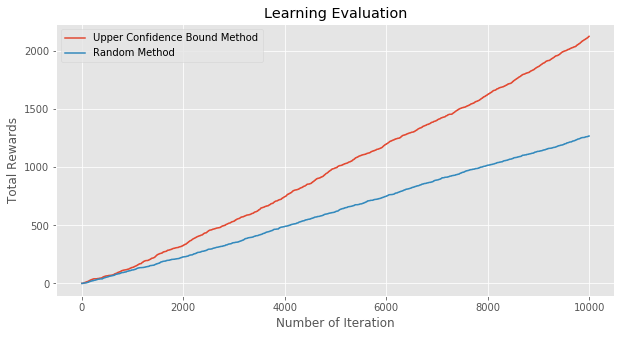

In [13]:
plt.figure(figsize=(10, 5))

plt.title('Learning Evaluation')
plt.xlabel('Number of Iteration')
plt.ylabel('Total Rewards')
plt.plot(ucb_rewards_history)
plt.plot(random_rewards_history)
plt.legend(['Upper Confidence Bound Method', 'Random Method'])
plt.show()

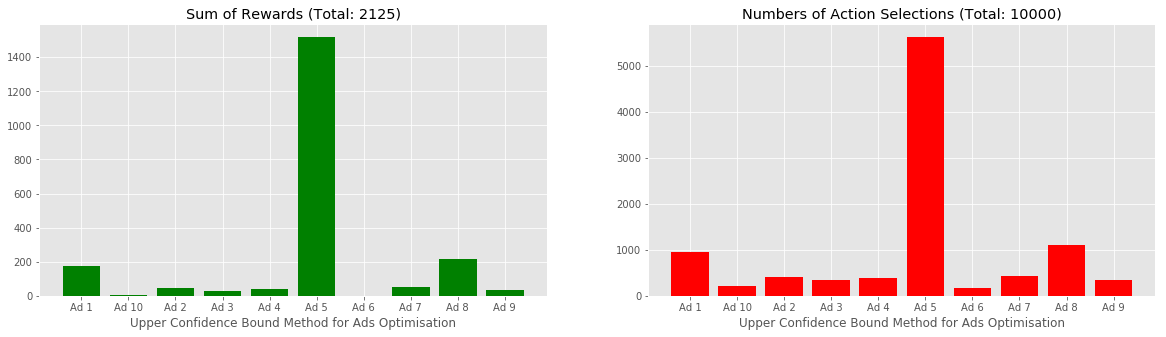

In [14]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
ads = ['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8', 'Ad 9', 'Ad 10']
plt.title(f'Sum of Rewards (Total: {total_rewards})')
plt.xlabel('Upper Confidence Bound Method for Ads Optimisation')
plt.bar(ads, sums_of_reward, color='green')

plt.subplot(1, 2, 2)
ads = ['Ad 1', 'Ad 2', 'Ad 3', 'Ad 4', 'Ad 5', 'Ad 6', 'Ad 7', 'Ad 8', 'Ad 9', 'Ad 10']
plt.title(f'Numbers of Action Selections (Total: {N})')
plt.bar(ads, numbers_of_selections, color='red')
plt.xlabel('Upper Confidence Bound Method for Ads Optimisation')
plt.show()

---